# Segmenting and Clustering Neighborhoods in Toronto

## Complete Notebook inclding all the parts

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' #url to the wiki site
df_list = pd.read_html(url) #get the list of data_frames from website
df = df_list[0] #we just want the first dataframe

In [3]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


good now we have export table into dataframe

In [4]:
df.shape

(287, 3)

In [5]:
df.Borough.value_counts()

Not assigned        77
Etobicoke           44
North York          38
Scarborough         37
Downtown Toronto    37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Queen's Park         1
Mississauga          1
Name: Borough, dtype: int64

drop raws where Borough=='Not assigned'

In [6]:
df.drop(df[df['Borough']=="Not assigned"].index, axis=0, inplace=True)

In [7]:
df.shape

(210, 3)

In [8]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [9]:
s1 = df.groupby('Postcode')['Neighbourhood'].unique() #get list of Neighbourhood against unique Postcode
s1.head()

Postcode
M1B                            [Rouge, Malvern]
M1C    [Highland Creek, Rouge Hill, Port Union]
M1E         [Guildwood, Morningside, West Hill]
M1G                                    [Woburn]
M1H                                 [Cedarbrae]
Name: Neighbourhood, dtype: object

In [10]:
s2 = df.groupby('Postcode')['Borough'].unique() ##get Borough against unique Postcode
s2.head()

Postcode
M1B    [Scarborough]
M1C    [Scarborough]
M1E    [Scarborough]
M1G    [Scarborough]
M1H    [Scarborough]
Name: Borough, dtype: object

In [11]:
df_combined = pd.concat([s2, s1], axis=1)

In [12]:
df_combined.reset_index(inplace=True) #reset_index will remove Postcode from index and make it a column

In [13]:
df_combined.head()

,Postcode,Borough,Neighbourhood
0,M1B,[Scarborough],"[Rouge, Malvern]"
1,M1C,[Scarborough],"[Highland Creek, Rouge Hill, Port Union]"
2,M1E,[Scarborough],"[Guildwood, Morningside, West Hill]"
3,M1G,[Scarborough],[Woburn]
4,M1H,[Scarborough],[Cedarbrae]


Now we have got combined Borough and Neighbourhood against each unique Postcode.  
However, still we need to remove bracets in each field

In [14]:
df_combined.head()

,Postcode,Borough,Neighbourhood
0,M1B,[Scarborough],"[Rouge, Malvern]"
1,M1C,[Scarborough],"[Highland Creek, Rouge Hill, Port Union]"
2,M1E,[Scarborough],"[Guildwood, Morningside, West Hill]"
3,M1G,[Scarborough],[Woburn]
4,M1H,[Scarborough],[Cedarbrae]


apply below lambda function to 'Brough' and 'Neighbourhood' to make each element to a string

In [15]:
df_combined['Borough']=df_combined['Borough'].apply(lambda x: ','.join(map(str,x)))
df_combined['Neighbourhood']=df_combined['Neighbourhood'].apply(lambda x: ','.join(map(str,x)))

In [16]:
df_combined.tail()

,Postcode,Borough,Neighbourhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie..."
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."
102,M9W,Etobicoke,Northwest


In [17]:
df_combined.shape

(103, 3)

## Second Part of the assignment

Since geocoder data is unstable, we will import longitude and latitude from given csv

In [18]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')

In [19]:
df_combined.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [20]:
df_toro = df_combined.merge(df_geo, left_on='Postcode', right_on='Postal Code').drop('Postal Code', axis=1)
df_toro.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Rename Postcode to Postalcode as shown in the assignment

In [21]:
df_toro.rename(columns={'Postcode':'PostalCode'}, inplace=True)

In [22]:
df_toro.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [23]:
df_toro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
PostalCode       103 non-null object
Borough          103 non-null object
Neighbourhood    103 non-null object
Latitude         103 non-null float64
Longitude        103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


## Part3: Explore and cluster the neighborhoods in Toronto

In [24]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # install folium
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Create a map of Toronto and superimpose Neighbourhood

In [32]:
df_toro['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Queen's Park         1
Name: Borough, dtype: int64

As suggested in assignment guidelines we will use only those boroughs that contain the word Toronto ("Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto")

In [33]:
only_toro = df_toro[df_toro['Borough'].isin(['Central Toronto','Downtown Toronto','West Toronto','East Toronto'])]
print ("shape =",only_toro.shape)
only_toro.head()

shape = (39, 5)


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Neighborhood reduced to 39.  
Lets plot entire dataset and superimpose those selected points in the same map

In [34]:
map_toro = folium.Map(location=[43.715383,-79.405678], zoom_start=10)

# add markers to map for total toro dataset
for lat, lng, borough, neighborhood in zip(df_toro['Latitude'], df_toro['Longitude'], df_toro['Borough'], df_toro['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toro)
    
map_toro

In [35]:
#map_toro = folium.Map(location=[43.715383,-79.405678], zoom_start=10)

# add markers to map from only_toro dataframe
for lat, lng, borough, neighborhood in zip(only_toro['Latitude'], only_toro['Longitude'], only_toro['Borough'], only_toro['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#39cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toro)
    
map_toro

Those red circles are the neighborhoods in "only_toro" dataframe where as blue circles are the neighbours in the "df_toro" other than in "only_toro" dataframe  
from here onwards we will use "only_toro" dataframe for clustering

In [36]:
Toronto_data = only_toro.reset_index(drop=True)

## Define Foursquare Credintial and Version

In [68]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: NCMXYN2A0HNWQH4GXNMUO1VPSBL3CP5C54B0UZBXZVSC2MWK
CLIENT_SECRET:GCIX1PKEONNQLXYCGH33ZIMU1F2CJQ031HUIAYRUMZPHDADU


In [38]:
Toronto_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


we will explore the first Neighbourhood, though we refers Neighbourhood we are acually exploring each unique PostalCode where Latitude and Longitude is available not for Neighbourhood but for each unique PostaCode  
However, we will explore first Neighbourhood, The Beaches (i.e. PostalCode = M4E) using Foursquare

## Now lets get top 100 venues in 'The Beaches'

In [39]:
limit = 100
radius = 500
lat = 43.676357
lng = -79.293031
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    lat,lng,
    VERSION,
    radius,
    limit
)

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2dd5179388d7001b708bc9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.680857004500005,
    'lng': -79.28682071453191},
   'sw': {'lat': 43.6718569955, 'lng': -79.29924128546809}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

## we will only get the required fields
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()


,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Glen Manor Ravine,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",43.676821,-79.293942
1,The Big Carrot Natural Food Market,"[{'id': '50aa9e744b90af0d42d5de0e', 'name': 'H...",43.678879,-79.297734
2,Glen Stewart Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",43.675278,-79.294647
3,Grover Pub and Grub,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",43.679181,-79.297215
4,Upper Beaches,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.680563,-79.292869


Now we will define a function that will extracts the category of the venue given a row of above dataframe

In [42]:
#explore the first venur.catagories data
nearby_venues['venue.categories'][0]

[{'id': '4bf58dd8d48988d159941735',
  'name': 'Trail',
  'pluralName': 'Trails',
  'shortName': 'Trail',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
   'suffix': '.png'},
  'primary': True}]

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
#get_category_type(nearby_venues.loc[0,:])

now we will replace venues.categories field with category names and change column names

In [45]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Glen Stewart Park,Park,43.675278,-79.294647
3,Grover Pub and Grub,Pub,43.679181,-79.297215
4,Upper Beaches,Neighborhood,43.680563,-79.292869


# Explore Neighborhood in Toronto

Now lets get all the venues nearby each postal code in Toronto dataset

In [46]:
Toronto_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [47]:
#define variables

PostalCodes=Toronto_data['PostalCode']
borough=Toronto_data['Borough']
n_hood=Toronto_data['Neighbourhood']
latitudes=Toronto_data['Latitude']
longitudes=Toronto_data['Longitude']

radius=500
LIMIT=100
venues_list=[] ##list to get venues for each neighborhood
for pc, borough, n_hood, lat, lng in zip(PostalCodes, borough, n_hood, latitudes, longitudes):
    print(n_hood)
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items'] #['response']['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    venues_list.append([(
            pc,
            borough,
            n_hood, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])

Toronto_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
Toronto_venues.columns = ['PostalCode',
                  'Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category', 
                  'Venue Latitude', 
                  'Venue Longitude']

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [48]:
len(venues_list)

39

In [49]:
Toronto_venues.shape

(1702, 9)

In [50]:
Toronto_venues.head()

,PostalCode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Glen Manor Ravine,Trail,43.676821,-79.293942
1,M4E,East Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,Glen Stewart Park,Park,43.675278,-79.294647
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,Pub,43.679181,-79.297215
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,Neighborhood,43.680563,-79.292869


Now let's see how many unique venur categories are there in the dataframe

In [51]:
len(Toronto_venues['Venue Category'].unique())

232

# Analyze each Neighbourhood

Note: 'Venue Category' contain a category name called "Neighborhood", which confuse with the 'Neighborhood' column of the Toronto_venues  
since we want original 'Neighborhood' in the onehot dataset, we will include it as 'Neighbourhood'

In [52]:
#{'Neighborhood'}.issubset(Toronto_onehot.columns)

In [53]:
#Toronto_venues[Toronto_venues['Venue Category']=='Neighborhood']

In [54]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.shape

(1702, 233)

In [55]:
Toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [56]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.0000,0.0000,0.000,0.000,0.000,0.02,0.0,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0,0.01,0.000000
1,Berczy Park,0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.017857,0.0,0.0,0.00,0.0,0.00,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.058824
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0.0625,0.0625,0.125,0.125,0.125,0.00,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000


### Lets confirm the new size

In [57]:
Toronto_grouped.shape

(39, 233)

## Clustering Neighbourhoods

Now we have a dataframe with weight of venue categories against each Neighbourhood
So now we are verymuch ready to use that data to cluster Neighbourhoods based on weight of venue categories

we will run k-means to cluster

In [58]:
# set number of clusters
kclusters = 5

Toronto_clustering = Toronto_grouped.drop('Neighbourhood', 1) ## be careful about the word Neighbourhood, otherwise we will drop the feature called Neighborhood

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=12).fit(Toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 0, 4, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

### Now let's create a dataframe including cluster lables

In [59]:
# add clustering labels to Toronto_grouped dataframe
Toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
Toronto_grouped.head()

,Cluster Labels,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,"Adelaide,King,Richmond",0.0,0.0000,0.0000,0.000,0.000,0.000,0.02,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0,0.01,0.000000
1,0,Berczy Park,0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.017857,0.0,0.0,0.00,0.0,0.00,0.000000
2,0,"Brockton,Exhibition Place,Parkdale Village",0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000
3,0,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.058824
4,0,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0.0625,0.0625,0.125,0.125,0.125,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.000000


In [60]:
Toronto_data[Toronto_data['Neighbourhood']=='Business Reply Mail Processing Centre 969 Eastern']

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
38,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


In [61]:
## Now lets mearge Toronto_data with Toronto_grouped on "Neighbourhood" so that we will have other required information for mapping
Toronto_merged = Toronto_data.join(Toronto_grouped.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,0.0,0.0,0.0,0.0,...,0.0,0.20000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,0.0,0.0,0.0,0.0,...,0.0,0.02439,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.02439
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.02439,0.0,0.0,0.02439
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000


### Now lets visualize resulting clusters on map

In [62]:
Toronto_merged['Cluster Labels'].value_counts()

0    33
2     3
4     1
3     1
1     1
Name: Cluster Labels, dtype: int64

In [63]:
# create map
map_clusters = folium.Map(location=[43.676357, -79.293031], zoom_start=11) #we use "The Beaches" location to initiate the map

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### It seems like k=5 is not a best value, let's use elbow method to find the best k value

we can use inertia_ value of the k-means model to evaluate the performance of the model

In [64]:
kmeans.inertia_

1.6160121056375103

In [65]:
# let's plot inertia for different values of k

k_values = []
inertias = []
for k in range(3,39):
    # run k-means clustering
    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=12).fit(Toronto_clustering)
    k_values.append(k)
    inertias.append(kmeans.inertia_)

#print("k values", k_values)
#print("inertias", inertias)


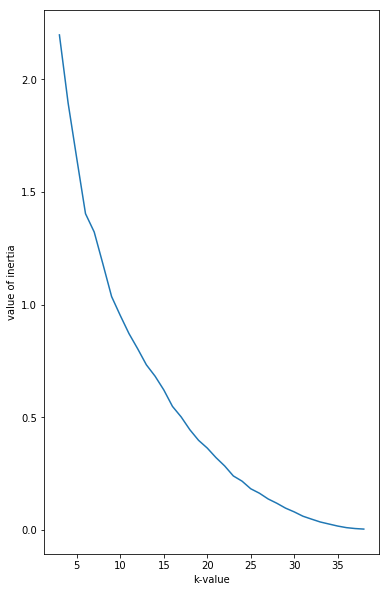

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot inertia against k-values
plt.figure(figsize=(6,10))
plt.plot(k_values, inertias)

plt.xlabel("k-value")
plt.ylabel("value of inertia")
plt.show()

according to above figure there is no clear lbow point, so this might be not suitable to cluster using k-means clustering